In [ ]:
##...Fashion MNIST is a dataset comprising 60,000 training images and 10,000
##testing images, each depicting various fashion items in a 28x28 grayscale format.
##The dataset encompasses ten distinct categories of apparel. The primary aim of
##this assignment is to develop a fully connected neural network (FCNN) that can
##accurately classify these images into the correct fashion categories....

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
###Data Visualization and Preprocessing:
#####Visualize the distribution of different fashion items in the dataset to
###understand the data better

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


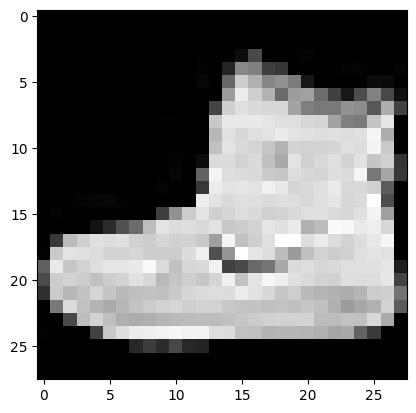

In [ ]:
plt.imshow(x_train[0],cmap = "gray")
plt.show()

In [ ]:
y_train[0]

9

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
pd.DataFrame(y_train).value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

In [ ]:
## there is no class im balance as all the classes are in equal number.

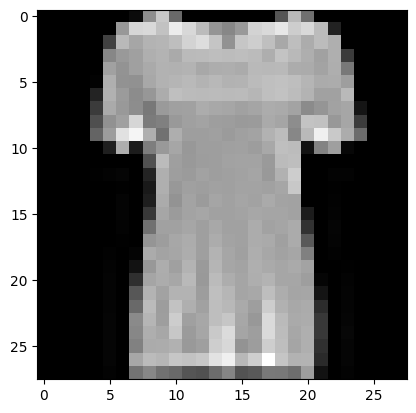

In [ ]:
plt.imshow(x_train[10], cmap = 'gray')

In [ ]:
y_train[10]

0

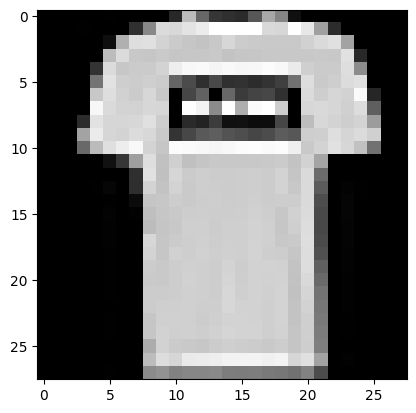

In [ ]:
plt.imshow(x_train[1], cmap = "gray")

In [ ]:
y_train[1]

0

In [ ]:
# Normalize the image pixel values for effective model training.

In [ ]:
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)


In [ ]:
x_train_flat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
## Convert the categorical labels into a one-hot encoded format to suit the
## neural network’s output laye

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
##Model Architecture and Development##
## Design a fully connected neural network with appropriate input, hidden,
## and output lay

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,Dropout

In [ ]:
model = Sequential() ## Empty model without any inputs or outputs
model.add(Input(shape=(784,))) ##no computation
model.add(Dense(units = 10, activation = "softmax"))# Multi class classification output.
## Softmax helps in converting all the ouputs of the 10 units into probabilities. If not for that
## the model would return numeric outputs ranging between (-inf, +inf)

In [ ]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics="accuracy")
# sgd = stochastic gradient descent

In [ ]:
model.fit(x=x_train_flat, y=y_train_ohe, epochs=15, validation_data=(x_test_flat, y_test_ohe))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2054.6775 - accuracy: 0.7390 - val_loss: 1125.5173 - val_accuracy: 0.7873
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1644.3131 - accuracy: 0.7789 - val_loss: 1454.4916 - val_accuracy: 0.7809
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1544.9558 - accuracy: 0.7857 - val_loss: 971.9237 - val_accuracy: 0.8224
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1521.2776 - accuracy: 0.7908 - val_loss: 3199.3213 - val_accuracy: 0.7156
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1466.1267 - accuracy: 0.7936 - val_loss: 1116.9836 - val_accuracy: 0.7822
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1497.4854 - accuracy: 0.7949 - val_loss: 956.9419 - val_accuracy: 0.8319
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1492.5088 - accuracy: 0.79

In [ ]:
preds = model.predict(x_test_flat)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(preds[0])
print(np.argmax(preds[0]))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.99999994]
9


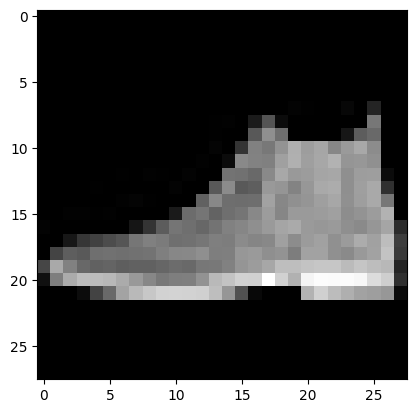

In [ ]:
plt.imshow(x_test[0], cmap="gray")
plt.show()

In [ ]:
## lets add one hidden layer with 100 neurons

In [ ]:
model = Sequential() ## Empty model without any inputs or outputs
model.add(Input(shape=(784,))) ##no computation
model.add(Dense(units = 100, activation = "tanh"))
model.add(Dense(units = 10, activation = "softmax"))# Multi class classification output.
## Softmax helps in converting all the ouputs of the 10 units into probabilities. If not for that
## the model would return numeric outputs ranging between (-inf, +inf)

In [ ]:
 Model Training  :
 the preprocessed training data, using categorical
cross-entropy as the loss function, stochastic gradient descent as the
optimizer, and accuracy as the evaluation metric.


In [ ]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics="accuracy")
# sgd = stochastic gradient descent

In [ ]:
Utilize a validation split to monitor the model’s performance on unseen
data during training.

In [ ]:
model.fit(x=x_train_flat, y=y_train_ohe, epochs=15, validation_data=(x_test_flat, y_test_ohe))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2623 - accuracy: 0.5591 - val_loss: 1.0820 - val_accuracy: 0.5834
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0577 - accuracy: 0.6246 - val_loss: 1.0072 - val_accuracy: 0.6704
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0457 - accuracy: 0.6278 - val_loss: 1.0584 - val_accuracy: 0.6014
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9543 - accuracy: 0.6388 - val_loss: 1.0236 - val_accuracy: 0.6659
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9161 - accuracy: 0.6534 - val_loss: 1.0004 - val_accuracy: 0.6190
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0274 - accuracy: 0.6271 - val_loss: 1.1078 - val_accuracy: 0.5871
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0857 - accuracy: 0.6048 - val_loss: 1.1745 - val_accuracy:

In [ ]:
Performance Evaluation:
● Assess the model’s performance using both training and validation
datasets.
● Visualize the training and validation loss and accuracy to identify any signs
of overfitting or underfitting.


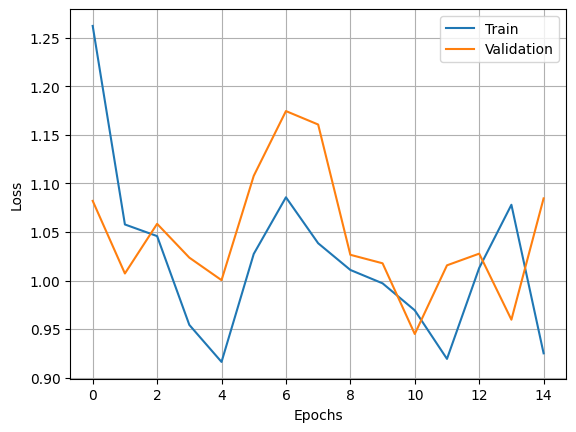

In [ ]:
history = model.history.history

train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
#plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

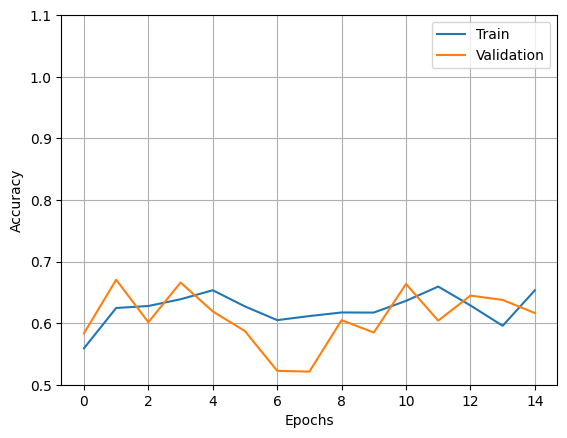

In [ ]:
train_acc= history["accuracy"]
val_acc= history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
## The models accuracy is very low, lets add one more hidden layer and increase the neurons to 200

In [ ]:
model = Sequential() ## Empty model without any inputs or outputs
model.add(Input(shape=(784,))) ##no computation
model.add(Dense(units = 200, activation = "relu"))
model.add(Dense(units = 200, activation = "tanh"))
model.add(Dense(units = 10, activation = "softmax"))# Multi class classification output.
## Softmax helps in converting all the ouputs of the 10 units into probabilities. If not for that
## the model would return numeric outputs ranging between (-inf, +inf)

In [ ]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics="accuracy")
# sgd = stochastic gradient descent

In [ ]:
model.fit(x=x_train_flat, y=y_train_ohe, epochs=20, validation_data=(x_test_flat, y_test_ohe))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0530 - accuracy: 0.6175 - val_loss: 0.8153 - val_accuracy: 0.7012
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7598 - accuracy: 0.7117 - val_loss: 0.7603 - val_accuracy: 0.7130
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7050 - accuracy: 0.7324 - val_loss: 0.6949 - val_accuracy: 0.7307
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6898 - accuracy: 0.7401 - val_loss: 0.7335 - val_accuracy: 0.7204
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6653 - accuracy: 0.7481 - val_loss: 0.6422 - val_accuracy: 0.7584
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6548 - accuracy: 0.7516 - val_loss: 0.6828 - val_accuracy: 0.7468
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6745 - accuracy: 0.7538 - val_loss: 0.6637 - val_accuracy:

In [ ]:
### increasing the neurons further to see if we can imporve the accuracy .

In [ ]:
model = Sequential() ## Empty model without any inputs or outputs
model.add(Input(shape=(784,))) ##no computation
model.add(Dense(units = 300, activation = "relu"))
model.add(Dense(units = 300, activation = "tanh"))
model.add(Dense(units = 10, activation = "softmax"))# Multi class classification output.
## Softmax helps in converting all the ouputs of the 10 units into probabilities. If not for that
## the model would return numeric outputs ranging between (-inf, +inf)

In [ ]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics="accuracy")
# sgd = stochastic gradient descent

In [ ]:
model.fit(x=x_train_flat, y=y_train_ohe, epochs=20, validation_data=(x_test_flat, y_test_ohe))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9945 - accuracy: 0.6423 - val_loss: 0.7630 - val_accuracy: 0.7021
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7483 - accuracy: 0.7128 - val_loss: 0.7432 - val_accuracy: 0.7245
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7052 - accuracy: 0.7297 - val_loss: 0.7317 - val_accuracy: 0.7417
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6649 - accuracy: 0.7426 - val_loss: 0.6553 - val_accuracy: 0.7322
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6571 - accuracy: 0.7494 - val_loss: 0.6804 - val_accuracy: 0.7278
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6579 - accuracy: 0.7474 - val_loss: 0.7039 - val_accuracy: 0.7317
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6478 - accuracy: 0.7570 - val_loss: 0.6064 - val_accur

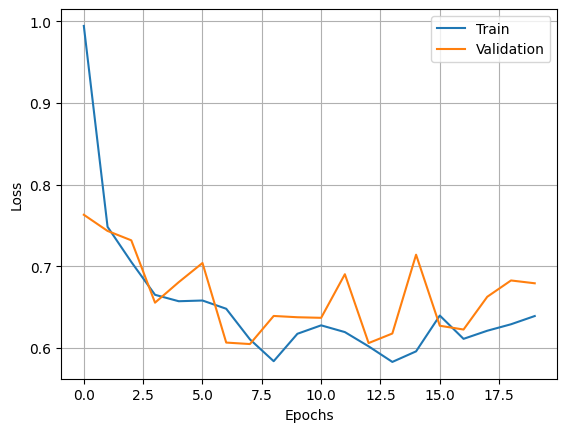

In [ ]:
history = model.history.history

train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
#plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

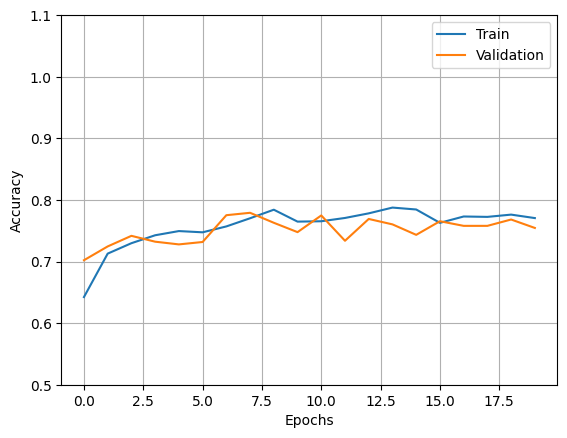

In [ ]:
train_acc= history["accuracy"]
val_acc= history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
## for the above model, we can see the validation data has less accuracy than the train data and error loss is more.
##So this is the case of overfitting, we add the dropout functionality to avoid overfitting.

In [ ]:
model = Sequential() ## Empty model without any inputs or outputs
model.add(Input(shape=(784,))) ##no computation
model.add(Dense(units = 300, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 300, activation = "tanh"))
model.add(Dense(units = 10, activation = "softmax"))# Multi class classification output.
## Softmax helps in converting all the ouputs of the 10 units into probabilities. If not for that
## the model would return numeric outputs ranging between (-inf, +inf)

In [ ]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics="accuracy")
# sgd = stochastic gradient descent

In [ ]:
model.fit(x=x_train_flat, y=y_train_ohe, epochs=20, validation_data=(x_test_flat, y_test_ohe))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.0091 - accuracy: 0.6239 - val_loss: 0.8224 - val_accuracy: 0.6636
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7687 - accuracy: 0.7001 - val_loss: 0.7044 - val_accuracy: 0.7167
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6942 - accuracy: 0.7305 - val_loss: 0.6825 - val_accuracy: 0.7283
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6617 - accuracy: 0.7454 - val_loss: 0.7250 - val_accuracy: 0.6998
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6480 - accuracy: 0.7513 - val_loss: 0.6241 - val_accuracy: 0.7581
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6470 - accuracy: 0.7561 - val_loss: 0.6255 - val_accuracy: 0.7657
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6321 - accuracy: 0.7642 - val_loss: 0.6013 - val_accu

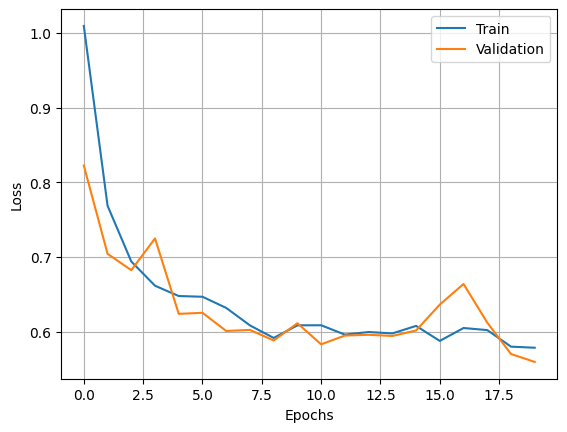

In [ ]:
history = model.history.history

train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
#plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

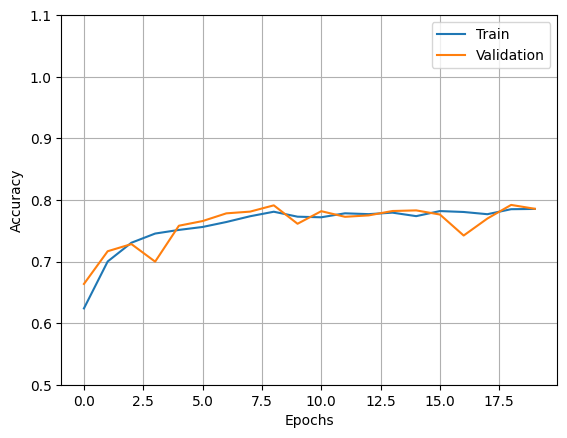

In [ ]:
train_acc= history["accuracy"]
val_acc= history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()